# Data Cleaning and Feature Selection

In [ ]:
!pip install zoofs

  Preparing metadata (setup.py) ... done
  Created wheel for zoofs: filename=zoofs-0.1.26-py3-none-any.whl size=23602 sha256=f6a90ce52bf0ab1b341f834631759a563d30e86faa1ba6216356f70556e195a3
  Stored in directory: /root/.cache/pip/wheels/c5/47/90/d0547288297679ffb3e38d6d5b700dab7bc0314cf677051b77
Successfully built zoofs


In [ ]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from mealpy.swarm_based.HHO import OriginalHHO
from zoofs import HarrisHawkOptimization
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
import sklearn
print("Training with scikit-learn version:", sklearn.__version__)

Training with scikit-learn version: 1.2.2


In [ ]:
# Load the CSV file
df = pd.read_csv('/content/IoT_Intrusion.csv')

# Display the first few rows of the dataframe
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [ ]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [ ]:
len(df.columns)

47

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50131 entries, 0 to 50130
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    50131 non-null  float64
 1   Header_Length    50131 non-null  float64
 2   Protocol Type    50131 non-null  float64
 3   Duration         50131 non-null  float64
 4   Rate             50131 non-null  float64
 5   Srate            50131 non-null  float64
 6   Drate            50131 non-null  float64
 7   fin_flag_number  50131 non-null  int64  
 8   syn_flag_number  50131 non-null  int64  
 9   rst_flag_number  50131 non-null  int64  
 10  psh_flag_number  50131 non-null  int64  
 11  ack_flag_number  50131 non-null  int64  
 12  ece_flag_number  50131 non-null  int64  
 13  cwr_flag_number  50131 non-null  int64  
 14  ack_count        50131 non-null  float64
 15  syn_count        50131 non-null  float64
 16  fin_count        50131 non-null  float64
 17  urg_count   

In [ ]:
df.shape

(50131, 47)

In [ ]:
df1 = df.sample(n=10000, random_state=42)

In [ ]:
df1.shape

(10000, 47)

In [ ]:
label_column = df1['label']

print(label_column.head())
print(label_column.tail())

38805       DoS-UDP_Flood
1003     DDoS-RSTFINFlood
33656       BenignTraffic
30036      DDoS-TCP_Flood
25885    DDoS-RSTFINFlood
Name: label, dtype: object
48425         Mirai-greeth_flood
18868              BenignTraffic
29310    DDoS-SynonymousIP_Flood
10542             DDoS-TCP_Flood
43805    DDoS-SynonymousIP_Flood
Name: label, dtype: object


In [ ]:
df1.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
48425,0.000000,0.00,47.0,64.0,3.998618,3.998618,0.0,0,0,0,...,0.000000,592.0,8.369419e+07,9.5,34.409301,0.000000,0.000000,0.0,141.55,Mirai-greeth_flood
18868,1.819307,4557128.00,6.0,233.0,1898.250147,1898.250147,0.0,0,0,0,...,15.517482,70.2,1.665169e+08,13.5,12.162596,21.987531,242.051164,1.0,244.60,BenignTraffic
29310,3.426049,137.16,6.0,64.0,0.735355,0.735355,0.0,0,1,0,...,0.000000,54.0,8.336545e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-SynonymousIP_Flood
10542,0.000000,54.00,6.0,64.0,0.841258,0.841258,0.0,0,0,0,...,0.000000,54.0,8.303415e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-TCP_Flood
43805,0.693080,86.40,6.0,64.0,1.294430,1.294430,0.0,0,1,0,...,0.000000,54.0,8.336254e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-SynonymousIP_Flood


In [ ]:
# Handling missing values: drop any rows where 'label' is missing
df1.dropna(subset=['label'], inplace=True)

In [ ]:
# Encode categorical labels
label_encoder = LabelEncoder()
df1['label'] = label_encoder.fit_transform(df1['label'])

In [ ]:
# Separate features and target
X = df1.drop(columns=['label'])
y = df1['label']

In [ ]:
# Stratify split if each class has at least two instances, otherwise, do simple random split
class_counts = y.value_counts()
if all(class_counts >= 2):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
else:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [ ]:
# Convert scaled arrays back to DataFrame, preserving column names
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_valid = pd.DataFrame(X_valid_scaled, index=X_valid.index, columns=X_valid.columns)

In [ ]:
pd.set_option('display.max_rows', 100)
print(df1.head(100))

       flow_duration  Header_Length  Protocol Type  Duration           Rate  \
38805       0.055233       44825.00          17.00     64.00  134430.339000   
1003        0.073360          68.28           6.22     65.91       2.231176   
33656      37.052591      103396.80           6.00    100.60      20.339741   
30036       0.000000          54.00           6.00     64.00       0.000000   
25885       0.000000          54.00           6.00     64.00       1.999225   
12214       0.000000          54.00           6.00     64.00       3.875073   
49506       0.000000           0.00           1.00     64.00       2.762046   
26422       0.000000          54.12           6.00     65.73       8.589018   
17298       0.194608       21738.12          16.40     67.11    7845.930060   
2975        4.315275         115.14           6.00     64.00       0.492483   
49679       0.000000           0.00           1.00     64.00       0.000000   
8564        0.000000         182.00          17.00  

In [ ]:
epoch_accuracies = []

def fitness(solution):
    selected_features_indices = np.where(solution > 0.5)[0]
    if len(selected_features_indices) == 0:
        return 1e10
    X_selected = X.iloc[:, selected_features_indices]
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3)
    # Initialize and fit the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    # Make predictions and calculate accuracy
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    epoch_accuracies.append(acc)
    return -acc

In [ ]:
from mealpy.utils.problem import Problem
from mealpy.utils.space import FloatVar

In [ ]:
# Define the bounds directly as tuples of arrays for lower and upper bounds.
bounds = FloatVar(np.zeros(X.shape[1]), np.ones(X.shape[1]))

problem_definition = {
    'obj_func': fitness,
    'bounds': bounds,
    'minmax': 'min',
}

In [ ]:
problem_obj = Problem(**problem_definition)

optimizer = OriginalHHO(epoch=10, pop_size=30)

best_agent = optimizer.solve(problem_definition)

INFO:mealpy.swarm_based.HHO.OriginalHHO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.HHO.OriginalHHO:>>>Problem: P, Epoch: 1, Current best: -0.988, Global best: -0.988, Runtime: 42.55443 seconds
INFO:mealpy.swarm_based.HHO.OriginalHHO:>>>Problem: P, Epoch: 2, Current best: -0.988, Global best: -0.988, Runtime: 46.25369 seconds
INFO:mealpy.swarm_based.HHO.OriginalHHO:>>>Problem: P, Epoch: 3, Current best: -0.9883333333333333, Global best: -0.9883333333333333, Runtime: 55.90109 seconds
INFO:mealpy.swarm_based.HHO.OriginalHHO:>>>Problem: P, Epoch: 4, Current best: -0.9883333333333333, Global best: -0.9883333333333333, Runtime: 48.11782 seconds
INFO:mealpy.swarm_based.HHO.OriginalHHO:>>>Problem: P, Epoch: 5, Current best: -0.9883333333333333, Global best: -0.9883333333333333, Runtime: 50.89300 seconds
INFO:mealpy.swarm_based.HHO.OriginalHHO:>>>Problem: P, Epoch: 6, Current best: -0.9883333333333333, Global best: -0.9883333333333333, Runtime: 49.18041 seconds
INFO:

In [ ]:
print(dir(best_agent))

['ID', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'compare_duplicate', 'copy', 'get_better_solution', 'id', 'increase', 'is_better_than', 'is_duplicate', 'kwargs', 'set_kwargs', 'solution', 'target', 'update', 'update_agent']


In [ ]:
# Extract the best solution and its corresponding fitness (or target) from the Agent object
best_solution = best_agent.solution
best_fitness = best_agent.target

accuracy = best_fitness
print(f"Accuracy: {accuracy}")

Accuracy: Objectives: [-0.98833333], Fitness: -0.9883333333333333


In [ ]:
# After optimization, to get the best features
selected_features_indices = np.where(best_solution > 0.5)[0]
selected_features = X.columns[selected_features_indices]  # This assumes X is a DataFrame

print("Selected features by HHO:", selected_features)

Selected features by HHO: Index(['flow_duration', 'Protocol Type', 'Duration', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'ack_flag_number',
       'ece_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTPS', 'Telnet', 'IRC', 'UDP', 'DHCP', 'IPv', 'Tot sum', 'Min', 'AVG',
       'IAT', 'Number', 'Radius', 'Variance'],
      dtype='object')


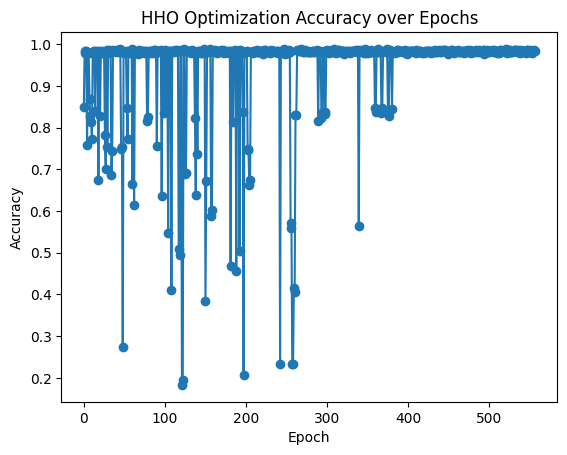

In [ ]:
# Plot the accuracies over epochs
plt.plot(epoch_accuracies, marker='o')
plt.title('HHO Optimization Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Optimization

In [ ]:
def levy_flights(beta):
    # Generates step sizes from a Levy distribution
    sigma = (np.math.gamma(1 + beta) * np.sin(np.pi * beta / 2) /
             (np.math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    return np.random.normal(0, sigma, size=(df1.shape[1],))

def get_fitness(solution):
    # Placeholder for your fitness function, e.g., classification accuracy
    # Implement your method to evaluate the solution here
    return np.random.rand()

def cuckoo_search(n_nests=25, max_generations=100, pa=0.25, beta=1.5):
    # Initialize nests randomly
    nests = np.random.rand(n_nests, df1.shape[1])
    fitness = np.array([get_fitness(nest) for nest in nests])

    for gen in range(max_generations):
        # Get a cuckoo randomly by levy flights
        cuckoo_idx = np.random.randint(n_nests)
        cuckoo = nests[cuckoo_idx] + levy_flights(beta)
        cuckoo_fitness = get_fitness(cuckoo)

        # Choose a nest randomly to replace
        nest_idx = np.random.randint(n_nests)
        if cuckoo_fitness > fitness[nest_idx]:
            nests[nest_idx] = cuckoo
            fitness[nest_idx] = cuckoo_fitness

        # Abandon a fraction pa of worse nests and build new ones
        worst_nests_idx = np.argsort(fitness)[:int(pa * n_nests)]
        nests[worst_nests_idx] = np.random.rand(len(worst_nests_idx), df1.shape[1])
        fitness[worst_nests_idx] = np.array([get_fitness(nest) for nest in nests[worst_nests_idx]])

        # Keep the best solution found
        best_nest_idx = np.argmax(fitness)
        best_nest = nests[best_nest_idx]
        best_fitness = fitness[best_nest_idx]

        print(f"Generation {gen+1}: Best Fitness {best_fitness}")

    return best_nest, best_fitness

In [ ]:
best_solution, best_fitness = cuckoo_search()
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

Generation 1: Best Fitness 0.9941096617375805
Generation 2: Best Fitness 0.9941096617375805
Generation 3: Best Fitness 0.9941096617375805
Generation 4: Best Fitness 0.9941096617375805
Generation 5: Best Fitness 0.9941096617375805
Generation 6: Best Fitness 0.9941096617375805
Generation 7: Best Fitness 0.9941096617375805
Generation 8: Best Fitness 0.9941096617375805
Generation 9: Best Fitness 0.9941096617375805
Generation 10: Best Fitness 0.9941096617375805
Generation 11: Best Fitness 0.9941096617375805
Generation 12: Best Fitness 0.9941096617375805
Generation 13: Best Fitness 0.9941096617375805
Generation 14: Best Fitness 0.9941096617375805
Generation 15: Best Fitness 0.9941096617375805
Generation 16: Best Fitness 0.9941096617375805
Generation 17: Best Fitness 0.9941096617375805
Generation 18: Best Fitness 0.9941096617375805
Generation 19: Best Fitness 0.9941096617375805
Generation 20: Best Fitness 0.9941096617375805
Generation 21: Best Fitness 0.9941096617375805
Generation 22: Best Fi

<ipython-input-28-d4b42dd12c61>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sigma = (np.math.gamma(1 + beta) * np.sin(np.pi * beta / 2) /
<ipython-input-28-d4b42dd12c61>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)


# Machine Learning Training

In [ ]:
target_column = 'label'

X = df[selected_features]
y = df[target_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.87%


In [ ]:
# Calculate metrics
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Output the precision, recall, and F1-score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Precision: 0.9876
Recall: 0.9887
F1-Score: 0.9876


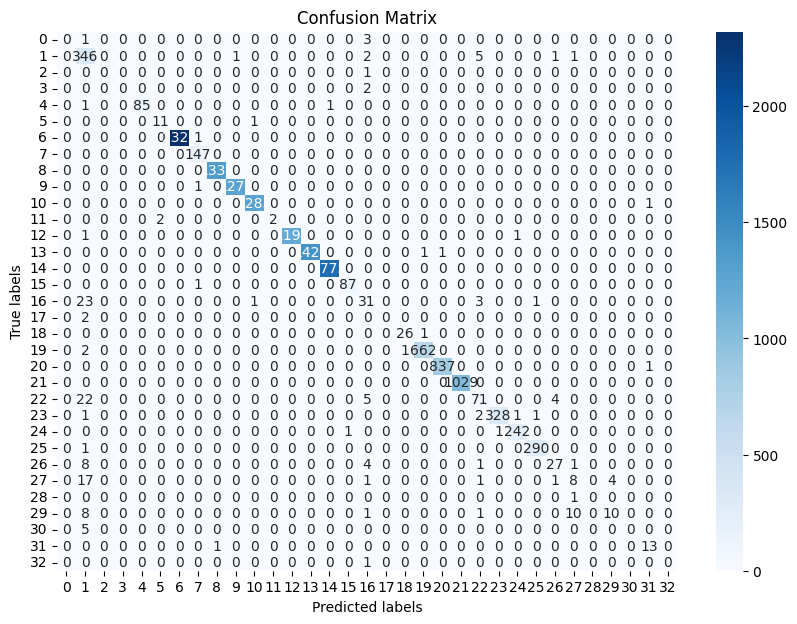

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# AdaBoost

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = ada_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score  # Re-import to ensure it's not overridden

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1_score_value = f1_score(y_test, y_pred, average='weighted')  # Change variable name here
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1_score_value:.4f}')

# You can also obtain a classification report for all metrics at once
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.4083
Precision: 0.3814
Recall: 0.4083
F1-Score: 0.3236
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00         4
          BenignTraffic       0.38      0.88      0.53       356
       BrowserHijacking       0.00      0.00      0.00         1
       CommandInjection       0.00      0.00      0.00         2
 DDoS-ACK_Fragmentation       0.00      0.00      0.00        87
        DDoS-HTTP_Flood       0.00      0.00      0.00        12
        DDoS-ICMP_Flood       0.97      0.84      0.90      2322
DDoS-ICMP_Fragmentation       0.98      0.97      0.98       147
      DDoS-PSHACK_Flood       0.00      0.00      0.00      1336
       DDoS-RSTFINFlood       1.00      1.00      1.00      1278
         DDoS-SYN_Flood       0.12      0.00      0.00      1286
         DDoS-SlowLoris       0.00      0.00      0.00         4
DDoS-SynonymousIP_Flood       0.90      0.08      0.15      1199
         DDoS-TCP_Floo

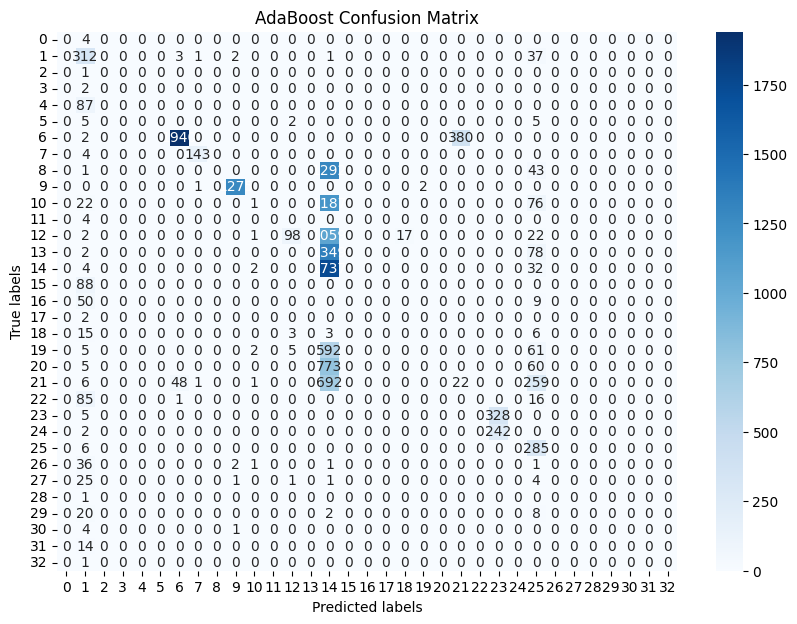

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('AdaBoost Confusion Matrix')
plt.show()

Accuracy: 0.9841
Precision: 0.9838
Recall: 0.9841
F1-Score: 0.9833
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00         4
          BenignTraffic       0.78      0.94      0.86       356
       BrowserHijacking       0.00      0.00      0.00         1
       CommandInjection       0.20      0.50      0.29         2
 DDoS-ACK_Fragmentation       0.98      0.95      0.97        87
        DDoS-HTTP_Flood       1.00      0.92      0.96        12
        DDoS-ICMP_Flood       1.00      0.99      0.99      2322
DDoS-ICMP_Fragmentation       0.97      0.99      0.98       147
      DDoS-PSHACK_Flood       0.99      1.00      1.00      1336
       DDoS-RSTFINFlood       0.99      1.00      0.99      1278
         DDoS-SYN_Flood       1.00      0.99      0.99      1286
         DDoS-SlowLoris       0.75      0.75      0.75         4
DDoS-SynonymousIP_Flood       1.00      1.00      1.00      1199
         DDoS-TCP_Floo

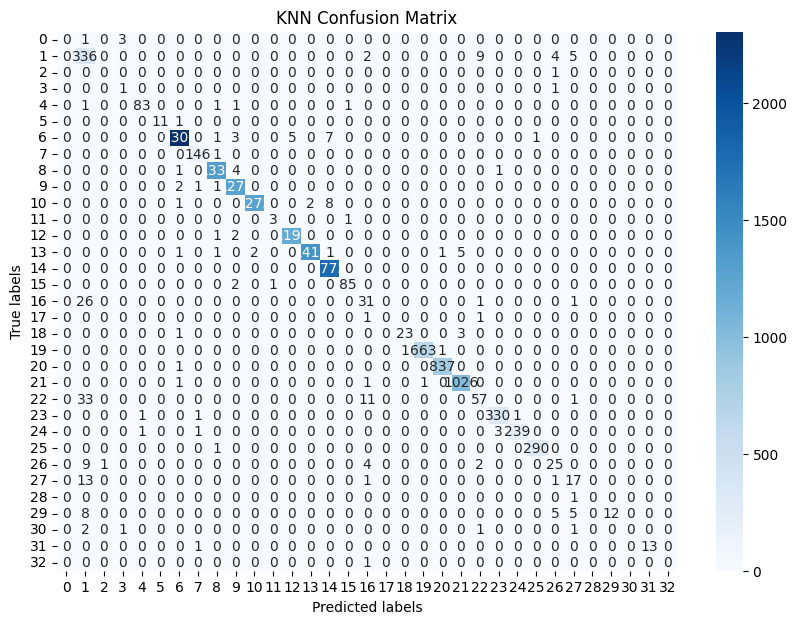

In [ ]:
# prompt: Use KNN algorithm

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn_classifier.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1_score_value = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1_score_value:.4f}')

# You can also obtain a classification report for all metrics at once
print(classification_report(y_test, y_pred, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('KNN Confusion Matrix')
plt.show()
